In [1]:
from train import train
train_loss, losses, model = train()

Using device cuda


TypeError: gs_loss() got an unexpected keyword argument 'p'

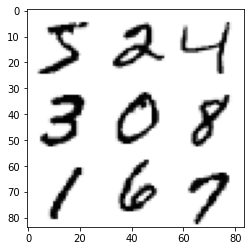

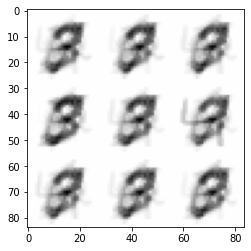

tensor([[2.7791e-03, 9.9722e-01, 9.9142e-01, 8.5789e-03, 1.0000e+00, 1.9148e-15,
         1.2764e-10, 1.0000e+00, 1.4456e-13, 1.0000e+00, 2.4343e-03, 9.9757e-01,
         9.9983e-01, 1.7284e-04, 1.0000e+00, 1.0865e-20, 2.4611e-21, 1.0000e+00,
         3.3421e-05, 9.9997e-01, 1.4665e-03, 9.9853e-01, 6.0390e-09, 1.0000e+00,
         2.0267e-05, 9.9998e-01, 6.6326e-01, 3.3674e-01, 2.4321e-06, 1.0000e+00,
         1.4511e-07, 1.0000e+00, 1.0756e-05, 9.9999e-01, 1.8732e-11, 1.0000e+00,
         4.9222e-01, 5.0778e-01, 1.0000e+00, 7.9137e-10, 9.9996e-01, 3.7870e-05,
         1.4859e-08, 1.0000e+00, 5.7647e-20, 1.0000e+00, 9.9953e-01, 4.6952e-04,
         1.0000e+00, 3.1315e-10, 1.0000e+00, 2.5288e-06, 9.9997e-01, 3.4095e-05,
         1.0858e-02, 9.8914e-01, 1.0000e+00, 1.3630e-08, 9.7148e-07, 1.0000e+00,
         1.0000e+00, 1.1348e-11, 9.9965e-01, 3.4887e-04, 1.0000e+00, 2.8686e-08,
         1.5369e-08, 1.0000e+00, 3.4672e-02, 9.6533e-01, 1.0000e+00, 3.3898e-16]],
       device='cuda:0', gr

In [22]:
from data import get_loader
import torch
import numpy as np
loader = get_loader(total_samples=1)
iter, x = list(enumerate(loader))[0]
x = x.to(torch.device("cuda"))
model.eval()
encoded = model.encoder(x)
discrete = model.activation(encoded, 1000)
decoded = model.decoder(discrete)

from util import show_mnist_images

show_mnist_images(x.cpu().detach().numpy()[0])
show_mnist_images(decoded.cpu().detach().numpy()[0])
discrete


In [4]:
from torchsummary import summary
import torchsummary
import importlib
importlib.reload(torchsummary)
import model as m
importlib.reload(m)
summary(model.float(), (84, 84, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
     GaussianNoise-1            [-1, 1, 84, 84]               0
            Conv2d-2           [-1, 16, 82, 82]             160
       BatchNorm2d-3           [-1, 16, 82, 82]              32
           Dropout-4           [-1, 16, 82, 82]               0
         ConvBlock-5           [-1, 16, 82, 82]               0
            Conv2d-6           [-1, 16, 80, 80]           2,320
       BatchNorm2d-7           [-1, 16, 80, 80]              32
           Dropout-8           [-1, 16, 80, 80]               0
         ConvBlock-9           [-1, 16, 80, 80]               0
          Flatten-10               [-1, 102400]               0
           Linear-11                   [-1, 50]       5,120,050
          Encoder-12                   [-1, 50]               0
    GumbelSoftmax-13                   [-1, 50]               0
      BatchNorm1d-14                   